In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat

In [2]:
datafile = "../../dataset/ch03/nightmares.txt"
nightmares = pd.read_csv(datafile, sep='\t')

In [3]:
nightmares.head()  # For Dream, N: "Nightmares"; n: "no nightmares"

,Side,Dream
0,L,N
1,L,N
2,L,N
3,L,N
4,L,N


In [4]:
pd.crosstab(index=nightmares.Dream, columns=nightmares.Side, margins=True)

Side,L,R,All
Dream,,,
N,9,6,15
n,13,35,48
All,22,41,63


In [5]:
pd.crosstab(index=nightmares.Dream, columns=nightmares.Side, 
            margins=True).rename(index={'N':'nightmare', 'n':'sweet dream'},
                                 columns={'L':'left sleeper', 'R':'right sleeper'})

Side,left sleeper,right sleeper,All
Dream,,,
nightmare,9,6,15
sweet dream,13,35,48
All,22,41,63


In [6]:
left_sleepers = nightmares[nightmares.Side=='L'].Side.count()
right_sleepers = nightmares[nightmares.Side=='R'].Side.count()
all_sleepers = left_sleepers + right_sleepers  # == len(nightmares)
print(f"Total Sleepers: {all_sleepers}")
print(f"Left Sleepers: {left_sleepers}")
print(f"Right Sleepers: {right_sleepers}")

Total Sleepers: 63
Left Sleepers: 22
Right Sleepers: 41


"*random_left_sleeper*" function simulates one single random draw of left sleeper with unconditional probability of 22/63.

Simulation: draw a random number from 1 to 63 (inclusive), with each number appearing with an equal probability.  Suppose the number drawn is
* between 1 and 22 (inclusive): left sleeper
* between 23 and 63: right sleeper

Return: 1 if left sleeper, 0 otherwise

In [7]:
def random_left_sleeper():
    if np.random.randint(1, 64) < 23:  # randint returns uniform integer from 1 (inclusive) to 64 (exclusive)
        return 1
    else:
        return 0

If having a nightmare is independent of sleep side, probability of having 9 or more nightmares is: 4.16%

With a cut-off significance of 5%, above probability is insignificant

This means that it rarely happens to have 9 or more nightmares

Therefore, having nightmares is dependent on sleep side


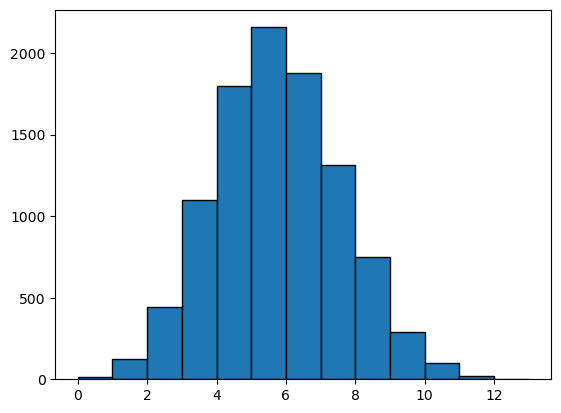

In [8]:
# simulation
trials = 10_000
left_nightmare_samples = np.zeros(trials)  # start with all zeros
sample_size = nightmares[nightmares.Dream=='N'].Dream.count()  # we know there are 15 nightmares
for i in range(trials):  # repeat the experiment for the number of trials
    for _ in range(sample_size):
        if random_left_sleeper():
            left_nightmare_samples[i] += 1  # add 1 more nightmare count to this sample
plt.hist(left_nightmare_samples, bins=range(0,14), edgecolor='k');
have_nine_or_more_nightmares = len([s for s in left_nightmare_samples if s >= 9])
print(f"If having a nightmare is independent of sleep side, "
      f"probability of having 9 or more nightmares is: {have_nine_or_more_nightmares / trials * 100}%\n")
print("With a cut-off significance of 5%, above probability is insignificant\n")
print("This means that it rarely happens to have 9 or more nightmares\n")
print("Therefore, having nightmares is dependent on sleep side")